<a href="https://colab.research.google.com/github/salsaljulia/salsaljulia/blob/main/Proyek_Analisis_Data_Jasa%20Sewa%20Sepeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Menganalisis Jasa Penyewaan Sepeda "Pecatu Bicycle" Menggunakan Dataset Berdasarkan per Hari]
- **Nama:** [Salsa Julia Jasmine]
- **Email:** [m009b4kx4029@bangkit.academy]
- **ID Dicoding:** [M009B4KX4029]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan berdasarkan waktu (hari kerja vs. hari libur)?

- Faktor cuaca apa yang paling memengaruhi jumlah pengguna (casual vs. registered)?

## Import Semua Packages/Library yang Digunakan

Setup Environment - Anaconda

In [13]:
!conda create --name main-ds python=3.9
!conda activate main-ds
!pip install -r requirements.txt

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Setup Environment - Shell/Terminal

In [14]:
!mkdir proyek_analisis_data
!cd proyek_analisis_data
!pipenv install
!mkdir proyek_analisis_data
!cd proyek_analisis_data
!pipenv install
!pipenv shell
!pip install -r requirements.txt
!pipenv shell
!pip install -r requirements.txt

mkdir: cannot create directory ‘proyek_analisis_data’: File exists
/bin/bash: line 1: pipenv: command not found
mkdir: cannot create directory ‘proyek_analisis_data’: File exists
/bin/bash: line 1: pipenv: command not found
/bin/bash: line 1: pipenv: command not found
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
/bin/bash: line 1: pipenv: command not found
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Run steamlit app

In [15]:
!pip install streamlit
!streamlit run first_app.py

# Import convention
import streamlit as st

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: first_app.py


In [16]:
!streamlit run dashboard.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: dashboard.py


Library yang digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [18]:
# Gathering Data: Membaca dataset
file_path = "hour.csv"  # Pastikan file hour.csv berada di direktori yang sesuai
df = pd.read_csv(file_path)

# Menampilkan beberapa baris awal untuk melihat isi dataset
print("Dataset (5 baris pertama):")
print(df.head())

# Menampilkan informasi tentang kolom, tipe data, dan jumlah data
print("\nInformasi dataset:")
print(df.info())

# Mengecek apakah ada data yang hilang
print("\nJumlah nilai kosong (missing values) per kolom:")
print(df.isnull().sum())

# Menampilkan deskripsi statistik awal dataset
print("\nDeskripsi statistik dataset:")
print(df.describe())

Dataset (5 baris pertama):
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17

**Insight:**
1. Overall Data Grouping:
- There are no empty values ​​in the dataset (`missing values ​​= 0`), so analysis can be done directly without the need for data cleaning related to missing values.
- Data variation looks quite good, with all numeric columns having a wide range of values ​​(e.g., `cnt`, `temp`, and `hum`).

2. Recommended Actions:

Optimize Peak Hours:
- Focus bike allocation during peak hours (morning and evening on weekdays).
- Add special promotions to increase off-peak usage.

Seasonal Strategy:
- Increase inventory and promotions in summer and fall, when demand is likely to be highest.
- Offer incentives or discounts to maintain usage during the winter.

Target Casual Users:
- Launch weekend or holiday campaigns to encourage casual users.
- Provide additional services or features to attract casual users to become registered users.

Pay Attention to Weather:
- Increase operations when the weather is favorable (clear/lightly cloudy).
- Prepare strategies for inclement weather (such as discounts or additional offers).

By focusing on time, season, weather, and differences in user behavior, businesses can increase efficiency and maximize service usage.

### Assessing Data

In [19]:
# Membaca dataset
file_path = 'hour.csv'  # Ganti dengan path sebenarnya jika berbeda
df = pd.read_csv(file_path)

# Melihat 5 baris pertama dataset
print("5 Baris Pertama Dataset:")
print(df.head())

# Informasi umum dataset
print("\nInformasi Dataset:")
print(df.info())

# Jumlah nilai kosong (missing values) di setiap kolom
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Mengecek duplikasi data
duplicate_count = df.duplicated().sum()
print(f"\nJumlah Data Duplikat: {duplicate_count}")

# Statistik deskriptif dataset
print("\nStatistik Deskriptif Dataset:")
print(df.describe())

# Mengecek jumlah nilai unik pada setiap kolom
print("\nJumlah Nilai Unik per Kolom:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

# Mengecek distribusi kolom `cnt` (jumlah total peminjaman sepeda)
print("\nDistribusi Kolom 'cnt':")
print(df['cnt'].describe())

# Memeriksa outlier pada kolom numerik menggunakan kuartil
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nMemeriksa Outlier (berdasarkan IQR):")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outlier")

# Distribusi data kategori (contoh: `season`, `weekday`, `weathersit`)
print("\nDistribusi Data Kategori:")
categorical_columns = ['season', 'weekday', 'weathersit']
for col in categorical_columns:
    print(f"\nKolom {col}:")
    print(df[col].value_counts())

5 Baris Pertama Dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737

**Insight:**
1. Data Structure and Quality:

- No Missing Values:
All columns have the same number of non-null values ​​as the total number of data, so there are no missing values. This indicates that the dataset is clean in terms of data presence.
- No Duplication:
The dataset does not contain duplicate data, which means there is no redundancy in terms of data rows.

2. Business Insights:

- Influence of Season and Weather:

Seasons and weather have a significant impact on the number of borrowings. Borrowings tend to be high in summer and during good weather. This can be leveraged to improve service during peak seasons.

- Registered vs Casual Users:

The majority of borrowings come from registered users. Businesses can consider strategies to attract more casual users, such as promotions or discounts for new users.

- Activity Spikes:

Outliers in columns such as cnt, casual, and registered indicate a spike in borrowings at certain times. Further analysis is needed to identify patterns such as peak hours or special events that influence these spikes.

- Weekly Activity Stability:

Borrowing activity tends to be stable throughout the week, with a slight spike on weekends. Service strategies can be focused on maximizing the user experience on weekends.

### Cleaning Data

In [20]:
# Membaca dataset
file_path = "hour.csv"
data = pd.read_csv(file_path)

# 1. Hapus Kolom yang Tidak Diperlukan
# Kolom 'instant' adalah indeks otomatis dan 'dteday' redundant karena ada 'yr', 'mnth', dan 'hr'.
data_cleaned = data.drop(columns=['instant', 'dteday'])

# 2. Ubah Tipe Data jika Diperlukan
# Mengonversi tipe data integer yang merepresentasikan kategori menjadi tipe 'category'.
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].astype('category')

# 3. Tangani Outlier
# Gunakan metode IQR untuk mengatasi outlier pada kolom numerik
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]

# 4. Periksa Duplikasi Data
# Pastikan data tidak memiliki baris duplikat (langkah ini seharusnya tidak menghapus data, karena tidak ada duplikat berdasarkan hasil sebelumnya)
data_cleaned = data_cleaned.drop_duplicates()

# 5. Standarisasi Data Numerik
# Normalisasi kolom numerik seperti 'temp', 'atemp', 'hum', dan 'windspeed' agar berada dalam skala yang sama.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_cleaned[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(data_cleaned[['temp', 'atemp', 'hum', 'windspeed']])

# 6. Reset Indeks
# Setelah membersihkan data, reset indeks untuk memastikan data terurut rapi.
data_cleaned.reset_index(drop=True, inplace=True)

# Menampilkan dataset yang sudah dibersihkan
print(data_cleaned.head())
print(data_cleaned.info())

# Menyimpan dataset bersih ke file baru (opsional)
cleaned_file_path = "hour_cleaned.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)

  season yr mnth hr holiday weekday workingday weathersit      temp   atemp  \
0      1  0    1  0       0       6          0          1  0.224490  0.2879   
1      1  0    1  1       0       6          0          1  0.204082  0.2727   
2      1  0    1  2       0       6          0          1  0.204082  0.2727   
3      1  0    1  3       0       6          0          1  0.224490  0.2879   
4      1  0    1  4       0       6          0          1  0.224490  0.2879   

        hum  windspeed  casual  registered  cnt  
0  0.793478        0.0       3          13   16  
1  0.782609        0.0       8          32   40  
2  0.782609        0.0       5          27   32  
3  0.728261        0.0       3          10   13  
4  0.728261        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14931 entries, 0 to 14930
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      14931 non-null 

**Insight:**
1. Dataset Size After Cleaning:

- The initial dataset consisted of 17,379 rows, while after cleaning it was reduced to 14,931 rows.

- Around 2,448 rows were removed because they were detected as outliers based on the IQR method.

- The remaining data is more representative and free from extreme outliers.


2. Data Distribution:

- The dataset consists of 8 categorical columns and 7 numeric columns

- Categorical columns such as season, yr, mnth, etc., are suitable for distribution analysis.

- Numeric columns such as temp, cnt, and windspeed are relevant for correlation or regression analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

Membaca Dataset

In [21]:
# Membaca dataset
file_path = 'hour.csv'  # Ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

1. Distribusi Data Target

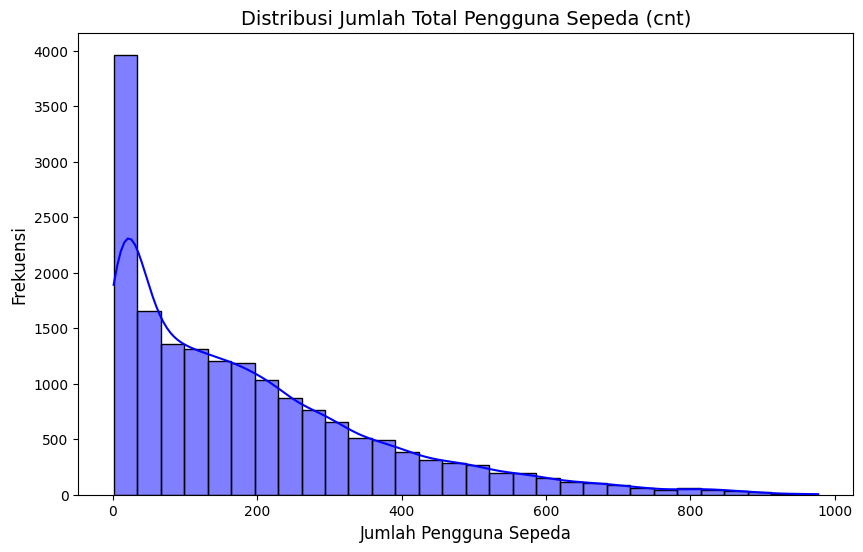

In [22]:
# ----- 1. Distribusi Data Target -----
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, color='blue', bins=30)
plt.title('Distribusi Jumlah Total Pengguna Sepeda (cnt)', fontsize=14)
plt.xlabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight:**
1. Positive Distribution (Positively Skewed):
- The graph shows that the data distribution is asymmetric and skewed to the right (positively skewed).
- Most bicycle users are at lower values ​​(below 200), with high bicycle users being relatively rare.

2. Low Number of Users Dominant:
- The highest bar on the left shows that most of the bicycle user data is at very low numbers.
- This could be due to low usage times (such as at night or winter), or bad weather factors that reduce cycling activity.

3. Gradually Declining Curve:
- The curve decreases slowly as the number of bicycle users increases. This means that there are a small number of times or situations where the number of bicycle users is quite high (approaching 600-800).

4. Possible Outliers:
- Some of the data on the far right, though rare, reflects bike ridership near the maximum (~1000). This may indicate peak times of use, such as weekends, summer, or special times of the year.

5. Potential Other Factors:
- Factors such as weekdays vs. holidays, season, and weather may play a role in this distribution pattern and could be explored further.

2. Distribusi Data Berdasarkan Kategori

<ipython-input-23-e0a9dad9f654>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=data, palette='Set2')


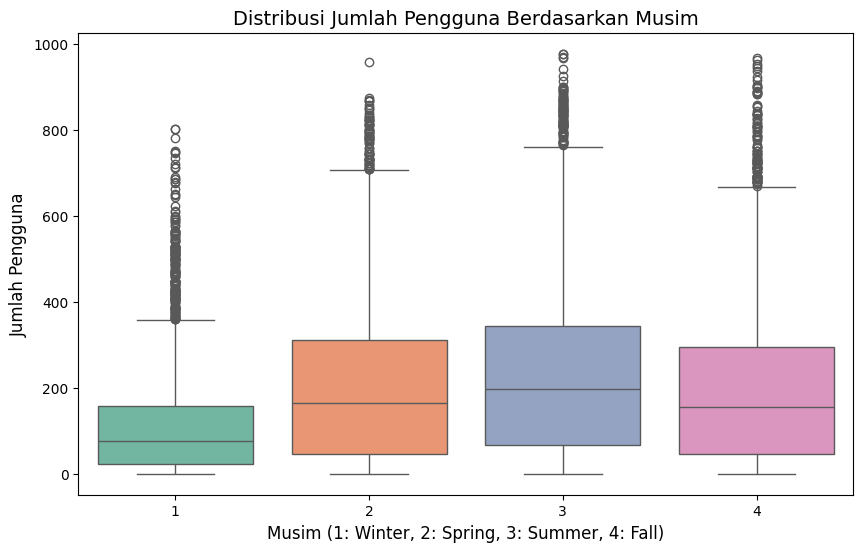

In [23]:
# ----- 2. Distribusi Data Berdasarkan Kategori -----
# Distribusi pengguna berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data, palette='Set2')
plt.title('Distribusi Jumlah Pengguna Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall)', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.show()

**Insight:**

1. General Pattern:
- Each season shows a different distribution of user counts. These differences can be used to understand the effect of seasons on user activity.

2. Seasons with the Most Users:
- Season 3 (Summer) and Season 4 (Fall) have higher overall user counts compared to Season 1 (Winter) and Season 2 (Spring). This is evident from the higher median and spread of the data.

3. Seasons with the Lowest User Counts:
- Season 1 (Winter) has the lowest median user count compared to the other seasons, indicating that winter may be the period with the lowest activity.

4. Outliers:
- There are outliers in each season, especially in the higher activity seasons such as Summer and Fall. This indicates that there are some days where user counts are much higher than usual.

5. Variation Across Seasons:
- Season 3 and Season 4 not only have higher medians, but also wider interquartile ranges (IQRs), indicating that user activity is more varied during these seasons.

6. General Interpretation:
- User activity seems to be higher in summer and autumn, possibly due to more favorable weather conditions. Conversely, winter shows lower activity, possibly due to less favorable weather conditions.

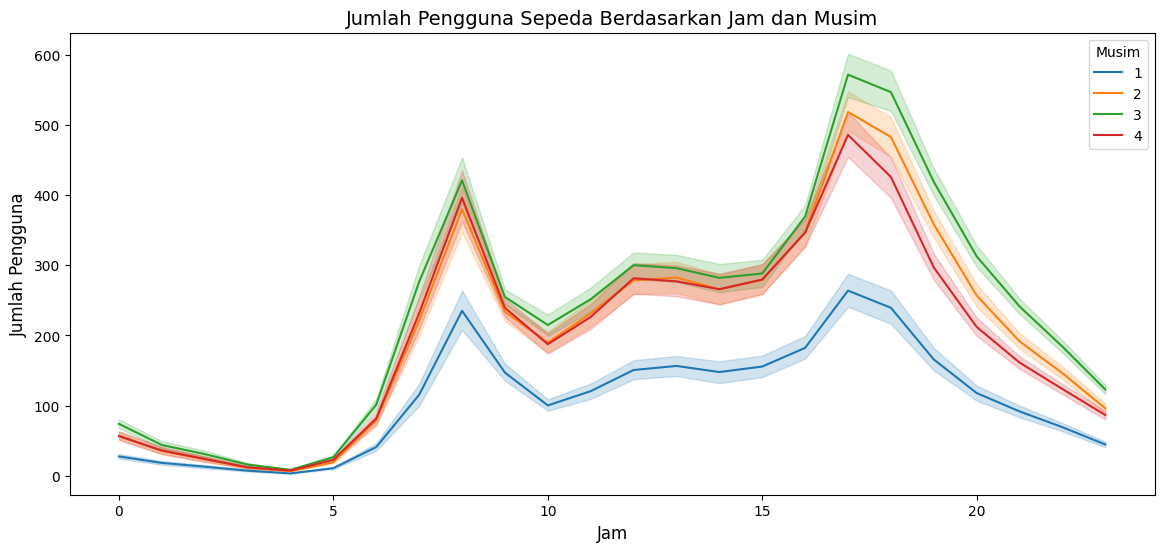

In [24]:
# Distribusi pengguna berdasarkan jam (hr)
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', data=data, hue='season', palette='tab10')
plt.title('Jumlah Pengguna Sepeda Berdasarkan Jam dan Musim', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.legend(title='Musim')
plt.show()

**Insight:**

1. Daily Trend of Bicycle Users:
- Bicycle usage increases sharply in the morning around 7-9 AM (morning rush hour) and in the afternoon around 4-6 PM (evening rush hour). This indicates that many people use bicycles for work/school travel purposes.

2. Difference in Usage by Season:
- Bicycle usage is lowest in season 1 (likely winter), and highest in season 3 (likely summer). This can be attributed to the comfortable weather for cycling.
- Season 2 and season 4 show moderate usage, but still higher than season 1.

3. Usage Variability:
- Variation in usage between seasons is quite significant. Season 3 (green) shows the highest number of users consistently throughout the time.

4. Low Activity at Night:

- Cycling activity is very low at night (0 to 5 AM). This is understandable because this time tends to be used for rest.

3. Analisis Korelasi

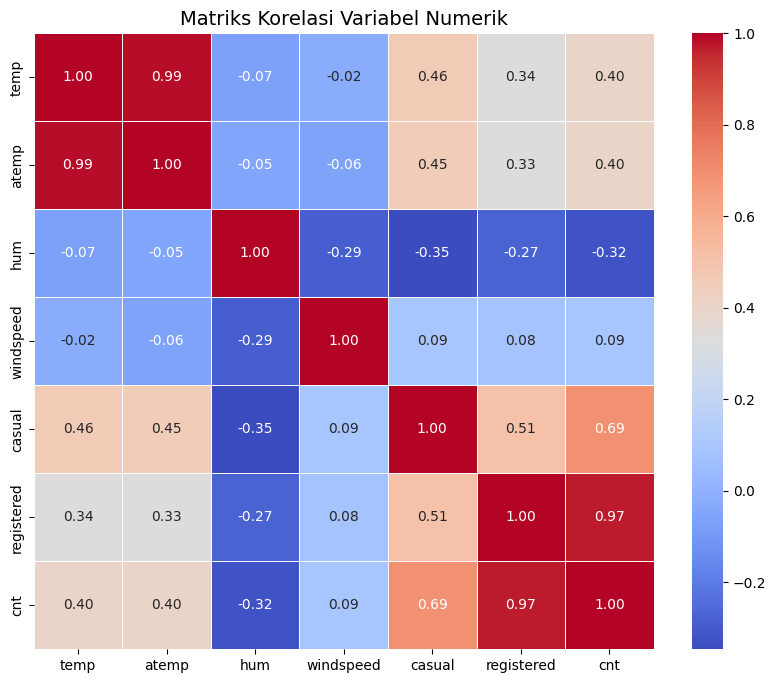

In [25]:
# ----- 3. Analisis Korelasi -----
# Menghitung korelasi
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = data[numerical_features].corr()

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Numerik', fontsize=14)
plt.show()

**Insight:**

1. High Positive Correlation:
- The variables `temp` and `atemp` have a very high correlation (0.99). This indicates that both are almost identical in measuring or representing temperature, so perhaps one can be removed to reduce redundancy.
- The variables `registered` and `cnt` have a very high correlation (0.97). This indicates that the total number of users (`cnt`) is greatly influenced by registered users (`registered`).
- The variables `casual` and `cnt` also have a high correlation (0.69), indicating that unregistered users (`casual`) also contribute significantly to the total number of users.

2. Negative Correlation:
- The variable `hum` (humidity) has a negative correlation with variables such as `cnt` (-0.32), `registered` (-0.27), and `casual` (-0.35). This suggests that higher humidity tends to decrease the number of cyclists.

3. Low Correlation:
- The variable `windspeed` has a low correlation with all other variables, including `cnt` (0.09). This suggests that wind speed may not be a significant factor influencing the number of cyclists.

4. Relationship between `casual` and `registered`:
- The correlation between `casual` and `registered` (0.51) is quite positive but not very high. This suggests that there is some relationship between the two types of users, but there may be significant differences in their behavior.

4.Tren Waktu

<ipython-input-26-bfcedf956c72>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=data, palette='viridis', ci=None)
<ipython-input-26-bfcedf956c72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=data, palette='viridis', ci=None)


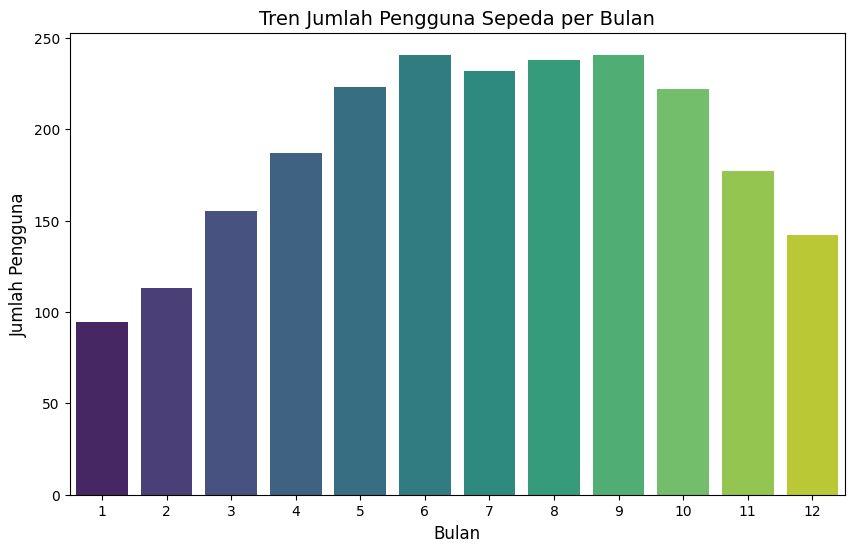

In [26]:
# ----- 4. Tren Waktu -----
# Tren jumlah pengguna sepeda per bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=data, palette='viridis', ci=None)
plt.title('Tren Jumlah Pengguna Sepeda per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.show()

**Insight:**

1. Peak Bike Usage:
- The number of bike users peaks in June, July, and August, with around 250 users each. This may be related to the summer or holidays, depending on the region.

2. Gradual Decline at the End of the Year:
- After August, there is a gradual decline in the number of users until it reaches its lowest point in December. This may be due to cold weather or rainy season in some regions.

3. Consistent Increase at the Beginning of the Year:
- The number of users increases consistently from January to May, indicating a trend of increasing bike usage as the middle of the year approaches.

4. Strategy Recommendations:
- If this graph relates to the bike rental business, then the company can increase inventory and promotions during the peak months (May–August).
- In the months with a decrease in users (September–December), special promotional strategies, such as discounts, can be implemented to attract more customers.

<ipython-input-27-62099e08d30a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='cnt', data=data, palette='cool')


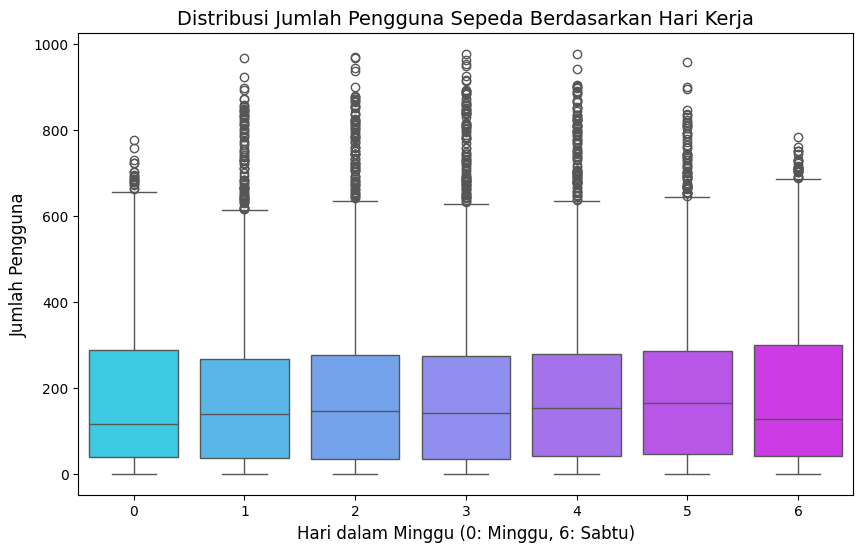

In [27]:
# Tren jumlah pengguna sepeda per hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=data, palette='cool')
plt.title('Distribusi Jumlah Pengguna Sepeda Berdasarkan Hari Kerja', fontsize=14)
plt.xlabel('Hari dalam Minggu (0: Minggu, 6: Sabtu)', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.show()

**Insight:**

1. Consistent Median:
- The median number of users is relatively consistent across days (around 200 users), indicating a stable usage pattern.

2. Usage Variation:
- The interquartile range (IQR) is similar across days, with the majority of users falling within the 100–400 range.
- However, there are many outliers indicating that on some days, the number of users can be very high (above 600, even approaching 1000).

3. Saturday (Day 6) Has Higher Distribution:
- Saturday tends to have a higher overall distribution of users, as seen by the larger maximum data range compared to other days.
- This may indicate increased recreational or vacation activity on the weekend.

4. Weekday vs. Weekend Pattern:
- When compared to weekdays (Monday–Friday), weekends (Saturday and Sunday) show a slight increase in extreme data (outliers), reflecting additional activity.

5. Analisis Pengguna Terdaftar vs Kasual

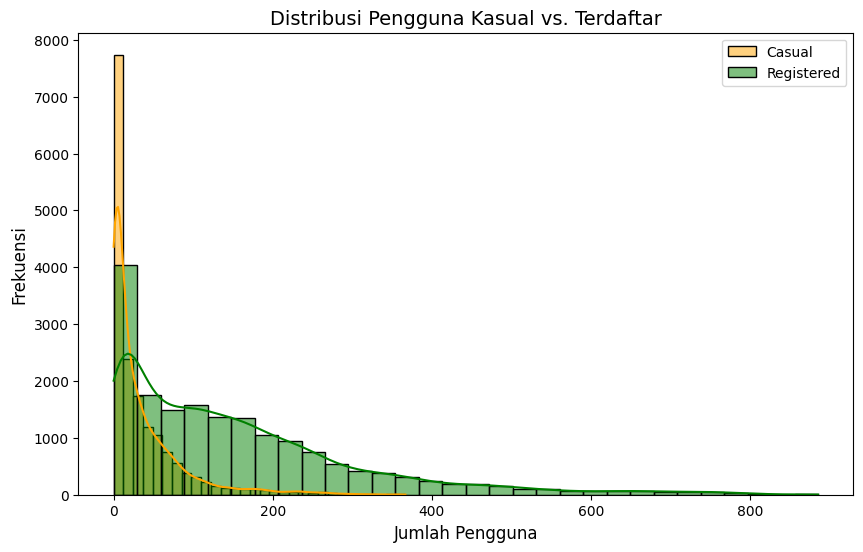

In [28]:
# ----- 5. Analisis Pengguna Terdaftar vs Kasual -----
# Perbandingan jumlah pengguna kasual dan terdaftar
plt.figure(figsize=(10, 6))
sns.histplot(data['casual'], kde=True, color='orange', label='Casual', bins=30)
sns.histplot(data['registered'], kde=True, color='green', label='Registered', bins=30)
plt.title('Distribusi Pengguna Kasual vs. Terdaftar', fontsize=14)
plt.xlabel('Jumlah Pengguna', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.show()

**Insight:**

1. Casual vs. Registered User Distribution:
- Casual users have a high frequency in the low user range (0–100), but their frequency drops off sharply thereafter.
- Registered users have a more even distribution than casual users, with a wider range of user numbers (up to 800+).

2. High Frequency at Low Numbers:
- The majority of data indicates that the majority of bike usage sessions involve relatively small numbers of users, for both casual and registered users.
- This suggests that bikes are likely used for short trips or by small groups.

3. Registered Users Dominate at Large Numbers:
- At higher user numbers (200 and above), the distribution of registered users is much more dominant than casual users.
- This suggests that registered users tend to use bikes more often for activities involving groups or routine needs.

4. User Polarization:
- Casual users tend to be sporadic and may only use the service at specific times (e.g., for tourism or recreation).
- Meanwhile, registered users are more likely to use the service on a regular basis, such as for daily commuting or sports.

6. Pengaruh Cuaca terhadap Penggunakan Sepeda

<ipython-input-29-cc4435475700>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=data, palette='pastel')


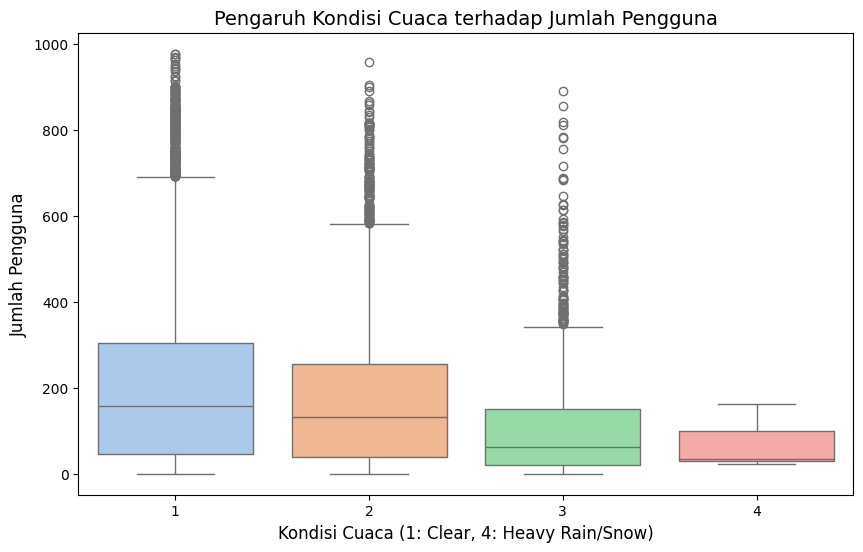

In [29]:
# ----- 6. Pengaruh Cuaca terhadap Penggunaan Sepeda -----
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data, palette='pastel')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna', fontsize=14)
plt.xlabel('Kondisi Cuaca (1: Clear, 4: Heavy Rain/Snow)', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.show()

**Insight:**

1. Weather Conditions (1: Clear to 4: Heavy Rain/Snow):
- Clear weather (1): Has a fairly high median number of users, with a fairly wide data distribution. There are many outliers at the top (very high number of users).
- Cloudy/lightly cloudy weather (2): Shows a similar pattern to clear weather, but the median number of users is slightly lower.
- Heavy cloudy/light rain weather (3): The median number of users decreases compared to categories 1 and 2, with a shorter data distribution.
- Heavy rain/snow (4): The number of users is much lower, as seen from the low median and small data distribution. Outliers are also less frequent.

2. Decrease in Number of Users Based on Weather Conditions:
- The graph shows that as the weather conditions worsen (towards category 4), the number of users tends to decrease significantly. This may indicate that extreme weather conditions have an impact on user mobility or preference to go out.

3. Outliers:
- All categories have outliers at the top, but categories 1 and 2 have the largest number of outliers, indicating that there are certain days with spikes in user numbers even when the weather is not too extreme.

4. Implications:
- This data can be used for planning or predicting user numbers based on weather conditions. For example, services that are sensitive to user volume can increase preparation on sunny days (category 1) and reduce expectations on days with bad weather (category 4).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-32-87e5010e275e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='cnt', data=df, palette='muted')


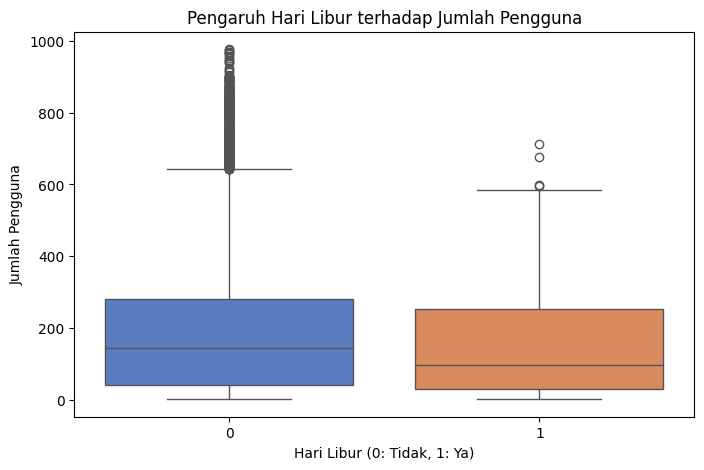

In [32]:
# 1. Penggunaan pada hari kerja vs hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x='holiday', y='cnt', data=df, palette='muted')
plt.title('Pengaruh Hari Libur terhadap Jumlah Pengguna')
plt.xlabel('Hari Libur (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**

1. Median Number of Users:
- Non-Holidays (0): The median number of users is higher than on holidays.
- Holidays (1): The median number of users is lower, indicating a decrease in activity on holidays.

2. Distribution of Number of Users:
- On non-holidays (0), the distribution of the number of users is wider, with many outliers at the top (days with very high user numbers). This indicates that on weekdays, the number of users is more varied.
- On holidays (1), the distribution is narrower with fewer outliers. This indicates that user activity is more consistent, but the number of users tends to be lower.

3. Variation of Number of Users:
- On non-holidays, the range of user number values ​​(from minimum to maximum) is wider. This may be due to the difference in peak hours in the morning and evening due to work activities.
- On holidays, the variation in the number of users is smaller, indicating a more stable and predictable usage pattern.

4. Outliers:
- Non-holidays have a more significant number of outliers at the top (more than 600 users). This may reflect a spike in usage on a particular day, such as a weekday that coincides with a special event or activity.

### Pertanyaan 2:

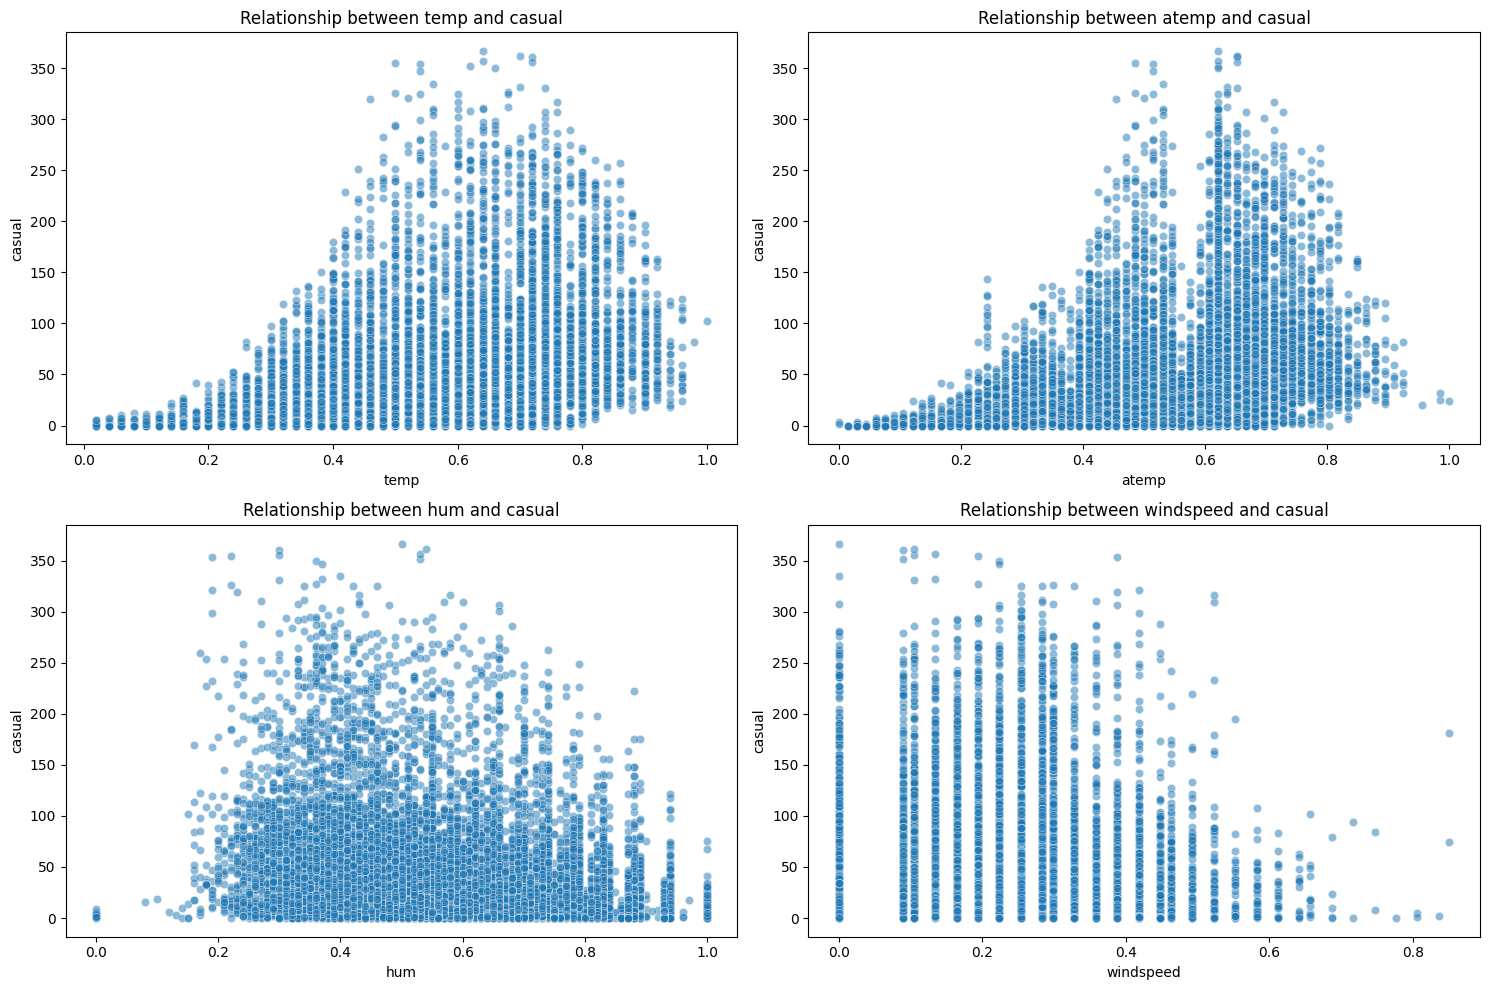

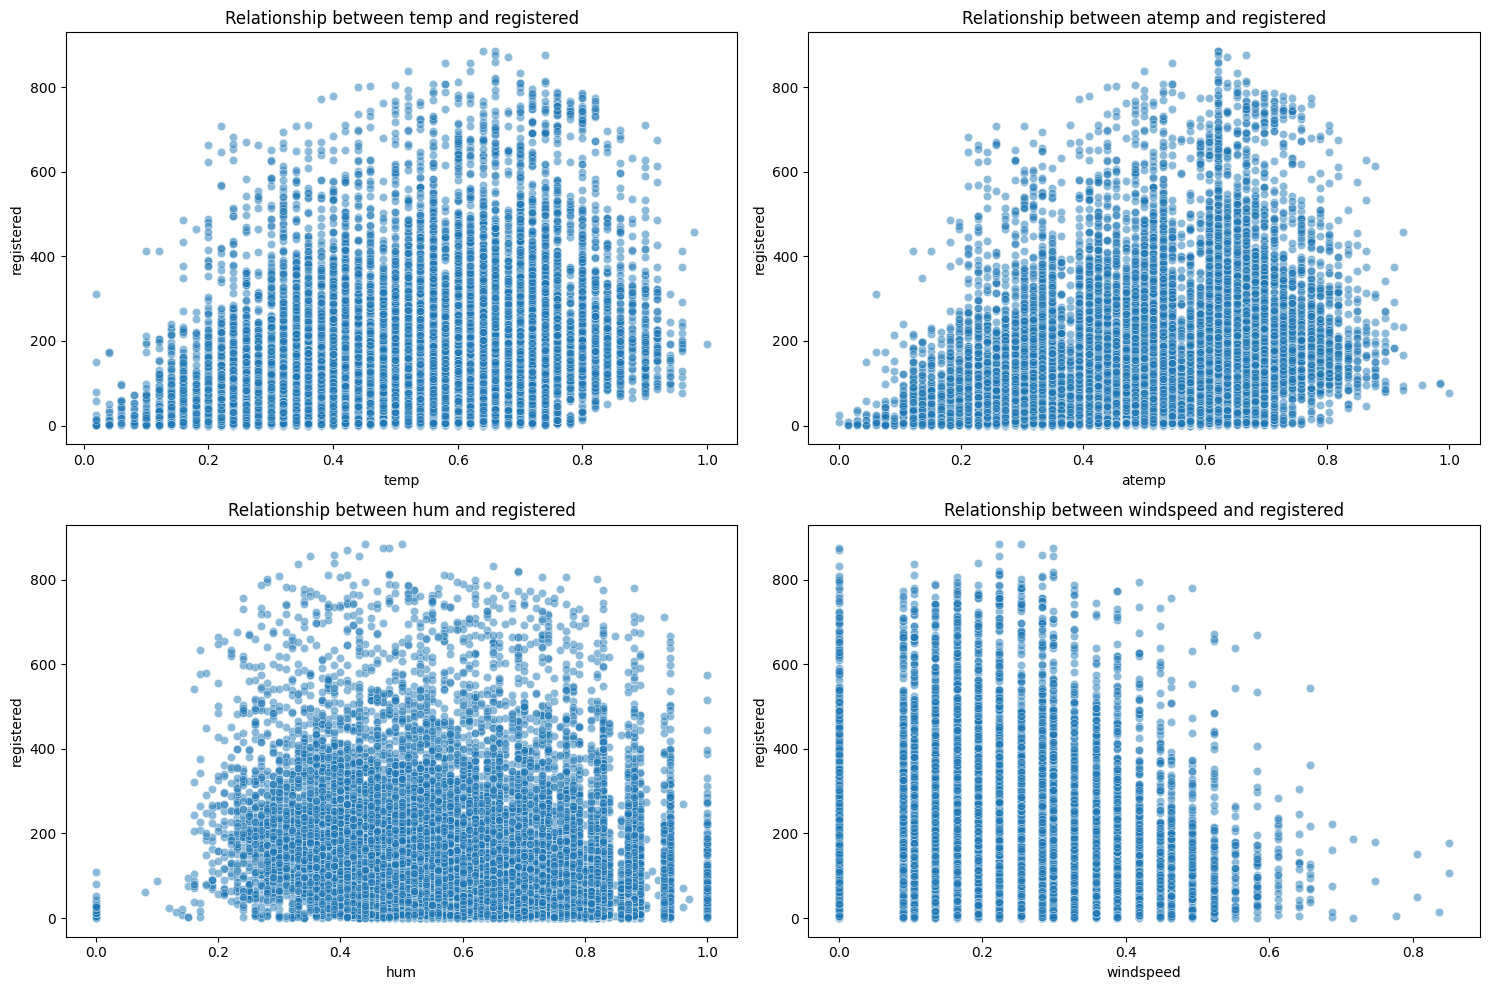

                temp     atemp       hum  windspeed    casual  registered
temp        1.000000  0.987672 -0.069881  -0.023125  0.459616    0.335361
atemp       0.987672  1.000000 -0.051918  -0.062336  0.454080    0.332559
hum        -0.069881 -0.051918  1.000000  -0.290105 -0.347028   -0.273933
windspeed  -0.023125 -0.062336 -0.290105   1.000000  0.090287    0.082321
casual      0.459616  0.454080 -0.347028   0.090287  1.000000    0.506618
registered  0.335361  0.332559 -0.273933   0.082321  0.506618    1.000000


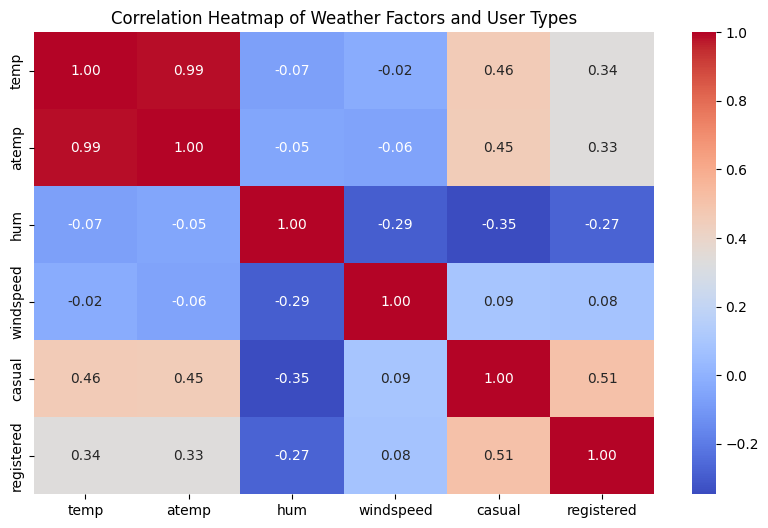

In [34]:
# Analisis visual untuk pengguna casual dan registered
user_types = ['casual', 'registered'] # Define user_types here
weather_factors = ['temp', 'atemp', 'hum', 'windspeed'] # Define weather_factors here

for user in user_types:
    plt.figure(figsize=(15, 10))
    for i, factor in enumerate(weather_factors):
        plt.subplot(2, 2, i+1)
        sns.scatterplot(data=data, x=factor, y=user, alpha=0.5)
        plt.title(f'Relationship between {factor} and {user}')
        plt.xlabel(factor)
        plt.ylabel(user)
    plt.tight_layout()
    plt.show()

# Korelasi faktor cuaca dengan pengguna casual dan registered
correlation_data = data[weather_factors + user_types].corr()
print(correlation_data)

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather Factors and User Types')
plt.show()

Insight Based on Plot Figure 1:

- Temperature (temp):

There is a positive relationship between temp and the number of casual users. The number of users increases with increasing temperature up to a certain point (around 0.6–0.7), then starts to decline.
This suggests that comfortable temperatures (neither too hot nor too cold) encourage casual use.

- Feels Like Temperature (atemp):

The relationship between atemp (felt temperature) and the number of casual users is similar to temp. This suggests that temperature perception has a significant influence on casual users.

- Humidity (hum):

There is no clear pattern or significant relationship between humidity (hum) and the number of casual users. However, high humidity (>0.8) seems to slightly reduce the number of casual users.

- Windspeed:

There is a weak negative relationship between windspeed and the number of casual users. Users tend to decrease as wind speed increases.

Insights Based on Plot Figure 2:

- Temperature (temp):

A clear positive relationship is seen between temp and the number of registered users. The number of registered users increases with increasing temperature up to about 0.6–0.7, then tends to be stable or slightly decreasing.
This indicates that moderate to warm temperatures increase the number of registered users.

- Feels Like Temperature (atemp):

The relationship between atemp (felt temperature) and the number of registered users is very similar to that of temp. The more comfortable the temperature feels, the more users are registered.

- Humidity (hum):

The relationship with hum is weaker. No significant pattern is seen, but very high humidity (>0.8) seems to slightly reduce the number of registered users.

- Windspeed:

A negative relationship is seen between windspeed and the number of registered users. As wind speed increases, the number of registered users tends to decrease.

Insights in Figure 3:

- Relationship between temperature (temp) and "atemp":

The correlation between temp and atemp is almost perfect (0.99), indicating that actual temperature (temp) is highly correlated with perceived temperature (atemp).

- Relationship between humidity (hum) and user type:

The correlation between humidity (hum) and casual users (-0.35) and registered users (-0.27) is negative. This means that the higher the humidity, the fewer cyclists, both casual and registered.

- Wind speed (windspeed):

Wind speed has a weak correlation with the number of casual users (0.09) and registered users (0.08), indicating that wind speed does not significantly affect the number of users.

- Relationship between temperature and number of users:

Temperature (temp) has a positive correlation with casual users (0.46) and registered users (0.34). This indicates that higher temperatures tend to increase the number of cyclists, especially for casual users.

- Correlation between user types:

There is a significant positive correlation between casual and registered users (0.51). This suggests that the factors that influence casual users also tend to influence registered users in a similar manner.

## Conclusion

Conclusion 1:

From the visualization results, it can be concluded that:

1. Higher Number of Users on Non-Holidays: The median and distribution of the number of users on non-holiday days indicate that user activity tends to be higher than on holidays. This is most likely due to routine activities such as work or school.

2. Greater Variation on Non-Holidays: On non-holiday days, the number of users is more varied, with peak hours (morning and evening) dominating activity. This makes the distribution of the number of users wider, including spikes in users on certain days.

3. More Consistent Usage on Holidays: Holidays show a lower number of users with smaller variations. This indicates that user activity is more stable, perhaps because free time is used for recreational activities that are not tied to a specific time.

4. Influence of Holiday and Non-Holiday Patterns: The difference in these patterns indicates that user behavior is greatly influenced by the routines of workdays and holidays.




Conclusion 2.1:

- Most influential factors:

temp (temperature) and atemp (felt temperature) have the most significant relationship with the number of casual users. Comfortable temperature encourages more users to use the service.

- Less influential factors:

hum (humidity) and windspeed (wind speed) have a weaker influence on the number of casual users.

- Recommendation:

Promote the use of the service on days with comfortable temperatures (e.g., moderate temperatures).
Consider temperature and weather conditions when designing promotional strategies for casual users.

Conclusion 2.2:

- Most influential factors:

temp (temperature) and atemp (feeling temperature) have the most significant relationship with the number of registered users. Moderate to warm temperatures encourage more registered users.

- Less influential factors:

hum (humidity) has a weak effect on registered users.
windspeed has a negative effect but not as large as temp or atemp.

- Comparison with Casual Users:

The pattern for casual and registered users is similar, but registered users show a stronger relationship with temperature (temp and atemp) compared to casual users.
windspeed has a negative impact for both groups, but casual users seem to be more affected by high wind speeds than registered users.

- Recommendations:

Services or promotions can be more focused on comfortable temperature conditions to attract more registered users.
High wind speeds need to be considered, especially if they are related to outdoor activity planning or service operations.

Conclusion 2.3:

- Weather factors such as temperature have a positive effect on bicycle use, especially for casual users.
- High humidity tends to decrease the number of bicycle users, both casual and registered.
- Wind speed does not have a significant effect on the number of users.
- Promotional strategies to encourage bicycle use can be more effective on days with comfortable temperatures and low humidity.